# College Segmentation : Clustering

**Name : Insan Cahya Setia**

## Overview

Dataset tersebut berisi data seluruh universitas di Amerika. Tugas kali ini adalah membuat cluster dari data tersebut yang hasilnya diharapkan dapat dimanfaatkan oleh pemerintah daerah untuk kesejahteraan masing-masing universitas.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

%load_ext autotime

time: 0 ns (started: 2021-11-02 22:46:40 +07:00)


## Load Dataset

In [2]:
college_data = pd.read_csv('College_Data.csv')
college_data.head()

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


time: 47 ms (started: 2021-11-02 22:46:40 +07:00)


## Data Profiling

In [3]:
# Dimention of dataframe
print('Data mempunyai {} baris dan {} kolom'.format(college_data.shape[0], college_data.shape[1]))

Data mempunyai 777 baris dan 18 kolom
time: 78 ms (started: 2021-11-02 22:46:40 +07:00)


In [4]:
# Check dataframe information
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [5]:
# Check missing value for each feature
college_data.isna().any()

Unnamed: 0     False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

time: 125 ms (started: 2021-11-02 22:46:40 +07:00)


In [6]:
# Check statistics description
college_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


time: 140 ms (started: 2021-11-02 22:46:41 +07:00)


## Data Preprocessing

In [7]:
# Rename column Unnamed: 0 to University
college_data.rename(columns={'Unnamed: 0':'University'}, inplace=True)
college_data.head()

,University,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


time: 47 ms (started: 2021-11-02 22:46:41 +07:00)


In [8]:
# Check the number of universities
num_univ = college_data['University'].nunique()
print('Banyaknya universitas : {} '.format(num_univ))

Banyaknya universitas : 777 
time: 47 ms (started: 2021-11-02 22:46:41 +07:00)


In [9]:
# Select features for University, Apps and Accept
perc_college_accept = college_data.loc[:, ['University', 'Apps', 'Accept']]
perc_college_accept.head()

,University,Apps,Accept
0,Abilene Christian University,1660,1232
1,Adelphi University,2186,1924
2,Adrian College,1428,1097
3,Agnes Scott College,417,349
4,Alaska Pacific University,193,146


time: 63 ms (started: 2021-11-02 22:46:41 +07:00)


In [10]:
# Make a percentage of the number of accepted applications
perc_college_accept['perc.Accept'] = perc_college_accept['Accept'] / perc_college_accept['Apps']
perc_college_accept.head()

,University,Apps,Accept,perc.Accept
0,Abilene Christian University,1660,1232,0.742169
1,Adelphi University,2186,1924,0.880146
2,Adrian College,1428,1097,0.768207
3,Agnes Scott College,417,349,0.836930
4,Alaska Pacific University,193,146,0.756477


time: 93 ms (started: 2021-11-02 22:46:41 +07:00)


In [11]:
# Sort Largest percentage in descending order
perc_college_accept.sort_values('perc.Accept', ascending=False).reset_index(drop=True)

,University,Apps,Accept,perc.Accept
0,Wayne State College,1373,1373,1.000000
1,Emporia State University,1256,1256,1.000000
2,Mayville State University,233,233,1.000000
3,Southwest Baptist University,1093,1093,1.000000
4,University of Wisconsin-Superior,910,910,1.000000
...,...,...,...,...
772,Brown University,12586,3239,0.257349
773,Amherst College,4302,992,0.230590
774,Yale University,10705,2453,0.229145
775,Harvard University,13865,2165,0.156149


time: 78 ms (started: 2021-11-02 22:46:41 +07:00)


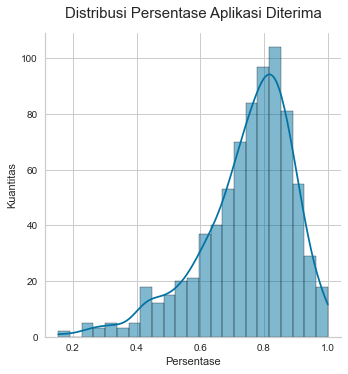

time: 516 ms (started: 2021-11-02 22:46:41 +07:00)


In [12]:
# Distribution of the percentage of the number of accepted applications
sns.displot(perc_college_accept['perc.Accept'], kde=True)
plt.title('Distribusi Persentase Aplikasi Diterima', fontsize=15, pad=15)
plt.xlabel('Persentase')
plt.ylabel('Kuantitas')
plt.show()

Dari grafik diatas terlihat bahwa rata-rata universitas di Amerika mempunyai persentase penerimaan sekitar 75% - 85%.

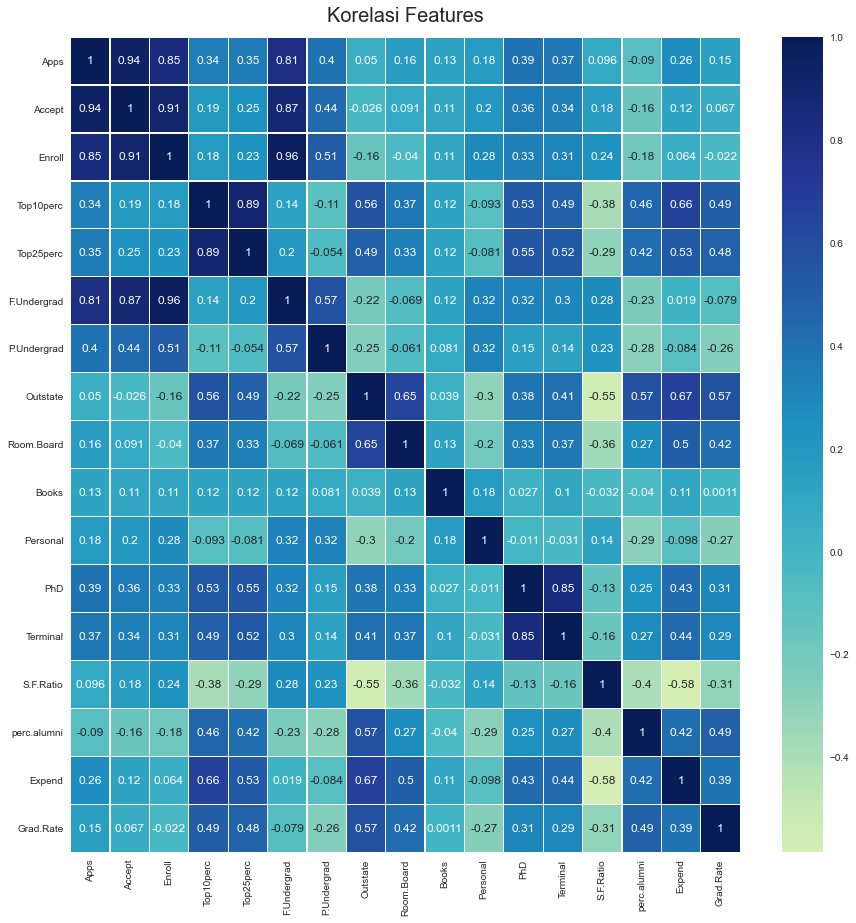

time: 4.5 s (started: 2021-11-02 22:46:42 +07:00)


In [13]:
# Correlation of each feature
plt.figure(figsize=(15,15))
sns.heatmap(college_data.corr(),
            annot=True,
            linewidths=.2,
            cbar=True,
            cmap="YlGnBu",
            center=0)
plt.title('Korelasi Features', fontsize=20, pad=15)
plt.show()

Dari korelasi diatas selanjutnya kita hanya akan memilih feature dengan korelasi yang tinggi, yaitu korelasi diatas 0.6, yaitu feature Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad', Outstate, Room.Board, PhD, Terminal, dan Expend

In [14]:
# Selection feature with high correlation, correlation >= 0.6
college_data = college_data[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'Outstate', 'Room.Board', 'PhD', 'Terminal', 'Expend']]
college_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,Outstate,Room.Board,PhD,Terminal,Expend
0,1660,1232,721,23,52,2885,7440,3300,70,78,7041
1,2186,1924,512,16,29,2683,12280,6450,29,30,10527
2,1428,1097,336,22,50,1036,11250,3750,53,66,8735
3,417,349,137,60,89,510,12960,5450,92,97,19016
4,193,146,55,16,44,249,7560,4120,76,72,10922


time: 15 ms (started: 2021-11-02 22:46:46 +07:00)


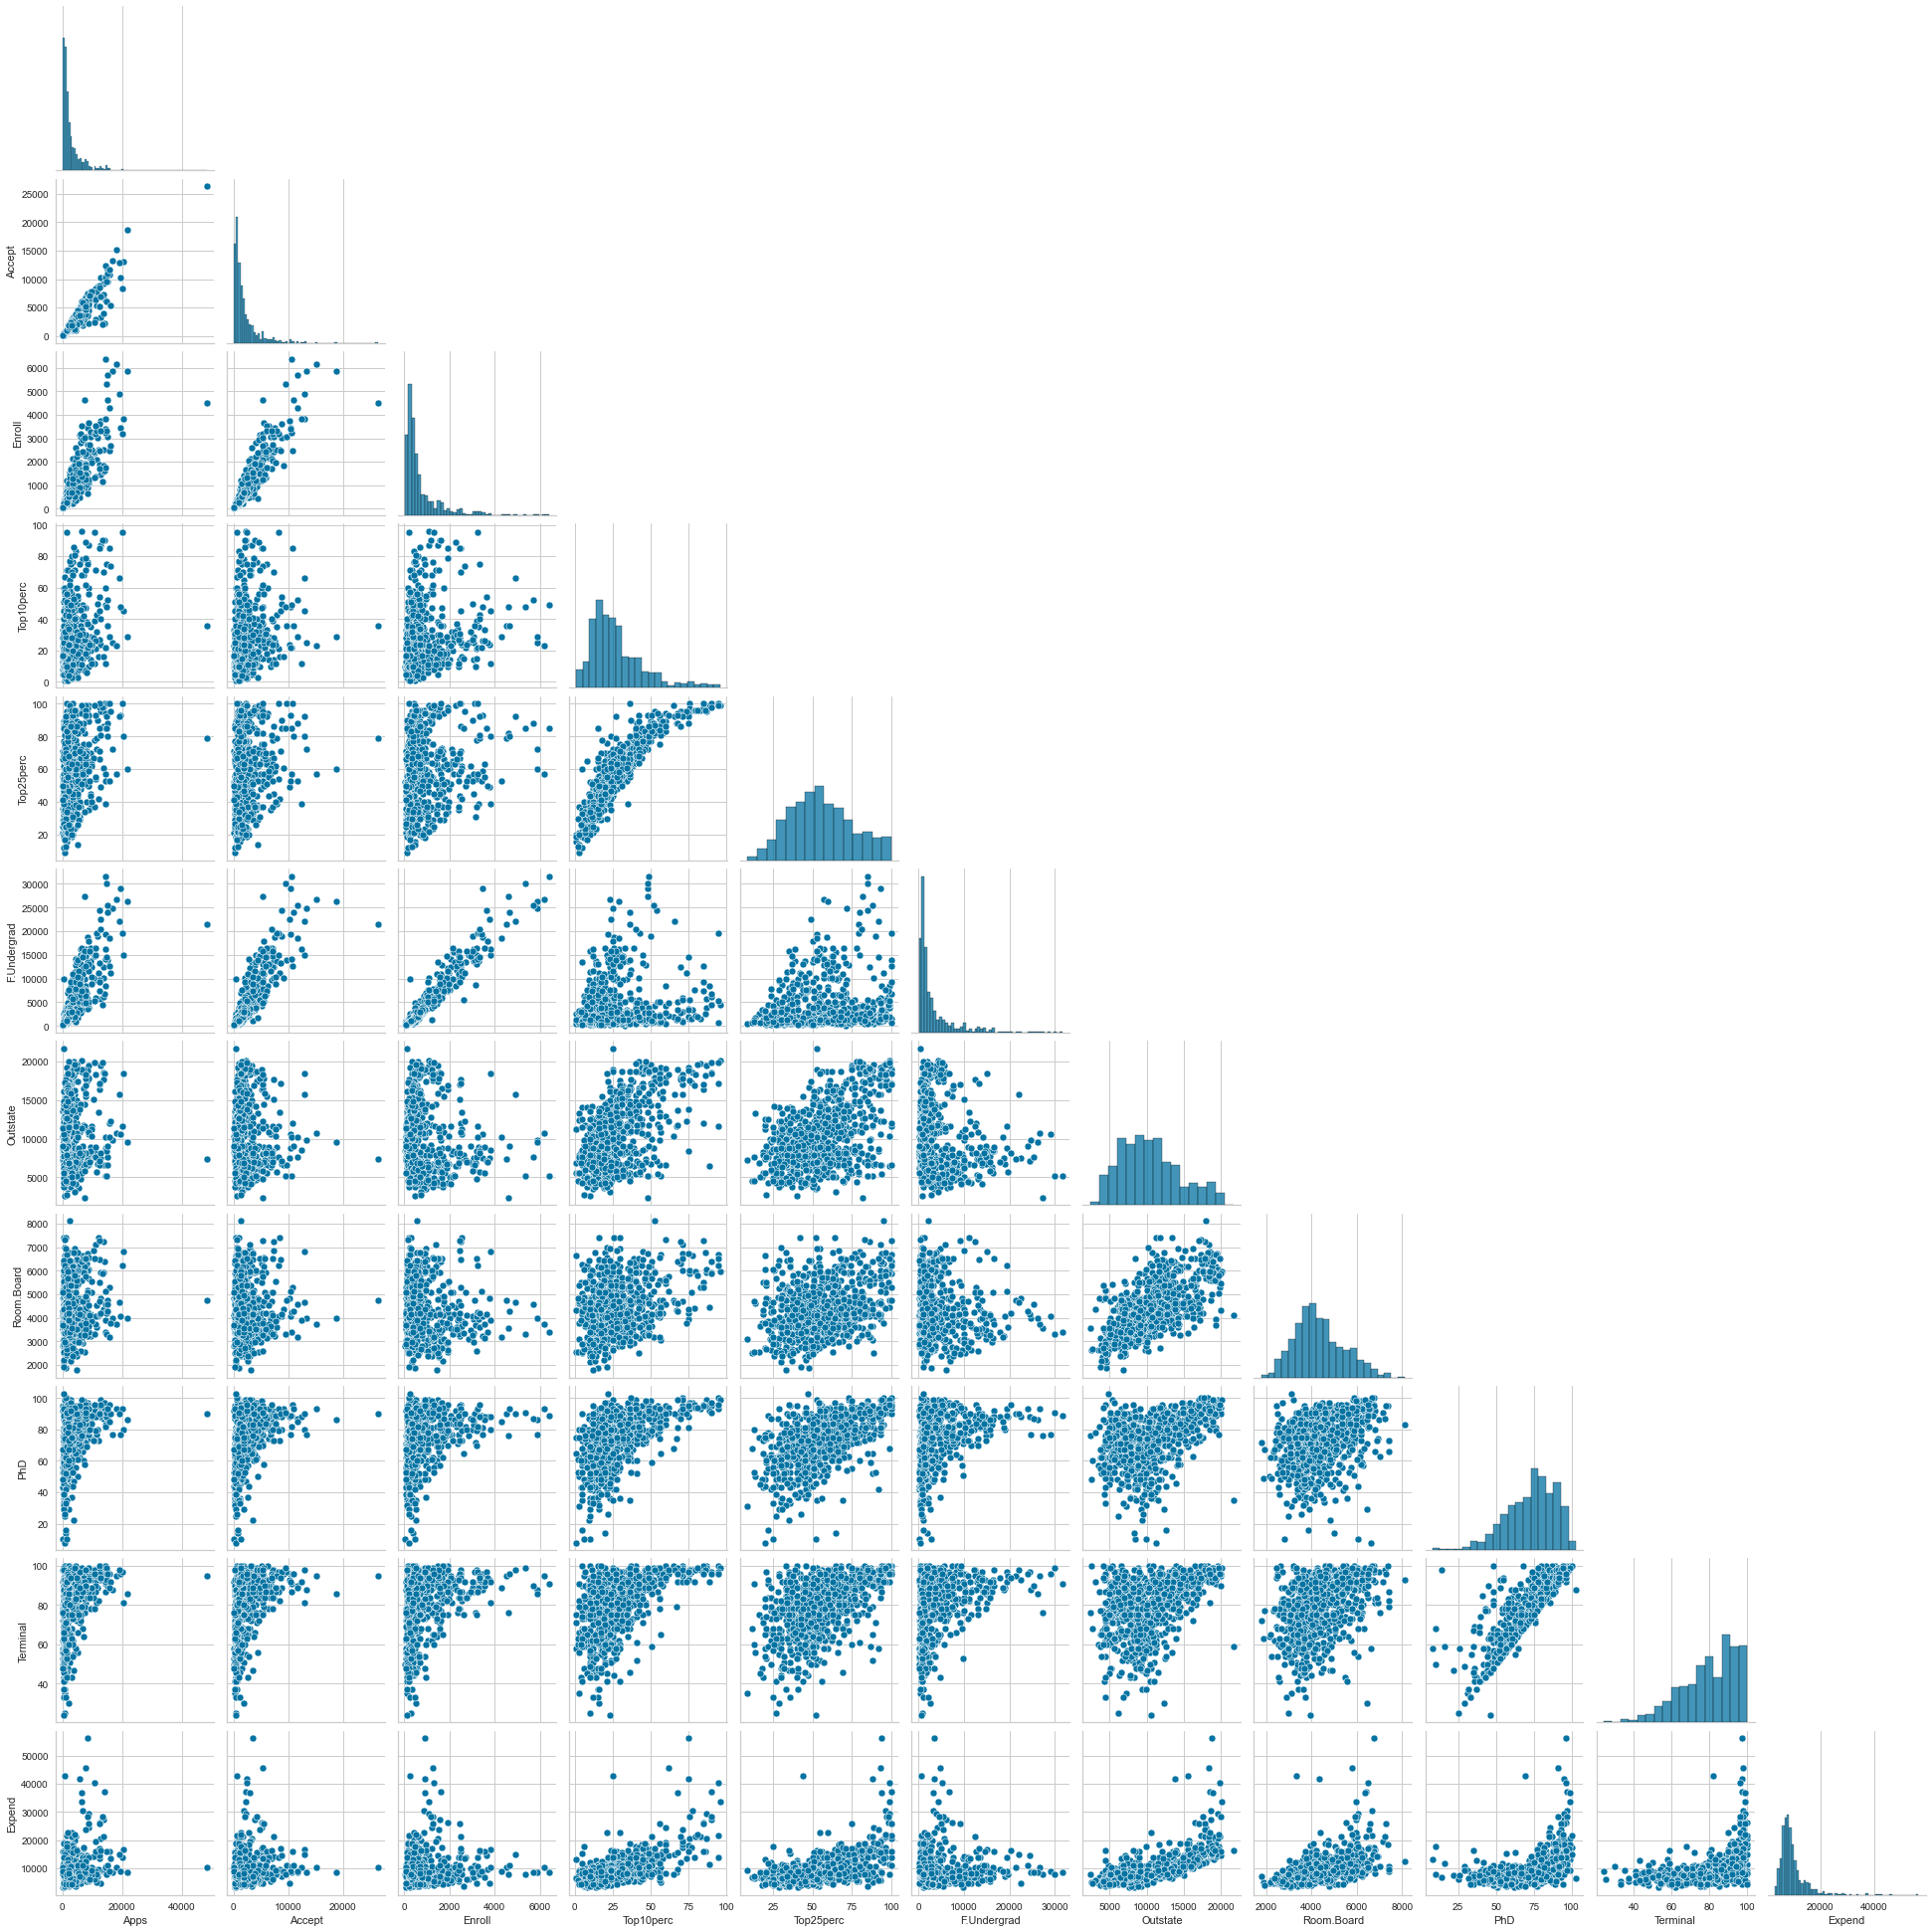

time: 22.2 s (started: 2021-11-02 22:46:46 +07:00)


In [15]:
sns.pairplot(college_data, corner=True)
plt.show()

## Detection Outliers

Deteksi outliers berguna untuk mencari apakah data yang kita punya mempunyai data ourliers atau tidak. Banyak metode untuk mencari outliers, salah satunya dengan cara visualisasi yaitu menggunakan boxplot.

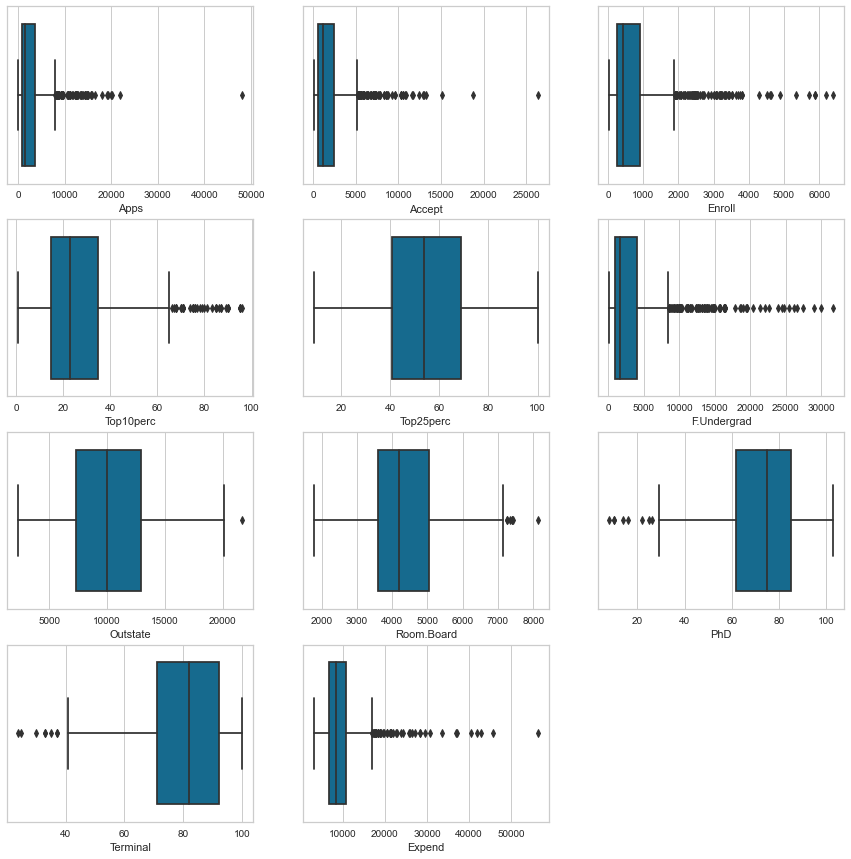

time: 1.86 s (started: 2021-11-02 22:47:09 +07:00)


In [16]:
# Use boxplot to detect outliers
plt.figure(figsize=(15,15))
pos = 1
for i in college_data.columns:
    plt.subplot(4, 3, pos)
    sns.boxplot(data=college_data, x=i)
    pos += 1

# Rescaling Features

Karena rentang nilai pada setiap feature beragam, mulai dari puluhan sampai ribuan, maka kita bisa melakukan rescaling pada setiap feature agar memiliki rentang nilai yang seragam. Pada beberapa algoritma machine learning mengharuskan semua feature memiliki rentang nilai yang sama. Karena jika tidak sama maka model yang dihasilkan akan sangat bias. Gunakan fungsi MinMaxScaler dari ScikitLearn untuk rescaling nilai pada setiap feature.

In [17]:
scaler = MinMaxScaler(feature_range = (0, 1))

train_data = scaler.fit_transform(college_data)
train_data

array([[0.03288693, 0.04417701, 0.10791254, ..., 0.65263158, 0.71052632,
        0.0726714 ],
       [0.04384229, 0.07053089, 0.07503539, ..., 0.22105263, 0.07894737,
        0.13838671],
       [0.0280549 , 0.03903572, 0.04734938, ..., 0.47368421, 0.55263158,
        0.10460535],
       ...,
       [0.04198863, 0.07018813, 0.10382256, ..., 0.62105263, 0.67105263,
        0.09683865],
       [0.22127341, 0.09067713, 0.20166745, ..., 0.92631579, 0.94736842,
        0.70126492],
       [0.06056693, 0.06790312, 0.10319333, ..., 0.70526316, 0.67105263,
        0.02494015]])

time: 16 ms (started: 2021-11-02 22:47:10 +07:00)


## Dimentionality Reduction using PCA

Dalam masalah clustering ini, kita mempunyai 11 feature yang sudah kita pilih dengan korelasi yang tinggi. Tetapi terkadang kita perlu mengurangi lagi jumlah feauture untuk mempercepat pelatihan model machine learning, salah satunya dengan dimentionality reduction (pengurangan dimensi). Salah satu teknik yang bisa digunakan untuk pengurangan dimensi yaitu Principal Compenent Analysis (PCA). 

PCA adalah analisis multivariate yang mentransformasi variabel-variabel (atribut) asal yang saling berkorelasi menjadi variabel-variabel baru yang tidak saling berkorelasi dengan mereduksi sejumlah variabel tersebut sehingga mempunyai dimensi yang lebih kecil namun dapat menerangkan sebagian besar keragaman variabel aslinya. Secara sederhana, tujuan dari PCA adalah mereduksi dimensi atau mengurangi jumlah atribut pada dataset tanpa mengurangi informasi.

Meskipun data yang kita punya relatif kecil, kita akan coba mengimplementasikan dimentionality reduction menggunakan PCA.

In [18]:
# Create a loop to select the number of principal component 
for i in range(1, train_data.shape[1]+1):
    pca = PCA(n_components=i)
    
    # PCA implementation on dataset
    pca.fit_transform(train_data)
    # see the variance of each attribute
    print('n_component : ', i)
    print('Variance', pca.explained_variance_ratio_)
    print('Jumlah ',np.array(pca.explained_variance_ratio_).sum())
    print('------------------')

n_component :  1
Variance [0.49453529]
Jumlah  0.494535291103426
------------------
n_component :  2
Variance [0.49453529 0.22408081]
Jumlah  0.7186161008619378
------------------
n_component :  3
Variance [0.49453529 0.22408081 0.10561254]
Jumlah  0.8242286448723287
------------------
n_component :  4
Variance [0.49453529 0.22408081 0.10561254 0.08374501]
Jumlah  0.9079736522980076
------------------
n_component :  5
Variance [0.49453529 0.22408081 0.10561254 0.08374501 0.03719701]
Jumlah  0.9451706631578848
------------------
n_component :  6
Variance [0.49453529 0.22408081 0.10561254 0.08374501 0.03719701 0.01899828]
Jumlah  0.9641689471798158
------------------
n_component :  7
Variance [0.49453529 0.22408081 0.10561254 0.08374501 0.03719701 0.01899828
 0.01635065]
Jumlah  0.9805196015072287
------------------
n_component :  8
Variance [0.49453529 0.22408081 0.10561254 0.08374501 0.03719701 0.01899828
 0.01635065 0.00917663]
Jumlah  0.989696232705519
------------------
n_component 

Dari hasil perhitungan PCA diatas kita bisa melihat variance dari setiap atribut. Pada langkah ini kita akan memilih n_component yang akan kita pilih. Variance pertama mempunyai nilai sebesar 0.49. Kita akan memilih principal component terbaik dengan jumlah principal component 7, karena total variance nya lebih dari 0.98 yang sudah cukup tinggi. 

In [19]:
# Create a PCA object with 7 principal components
pca = PCA(n_components=7)

# PCA implementation on dataset
train_data_pca = pca.fit_transform(train_data)

# See the variance of each attribute
pca.explained_variance_ratio_

array([0.49453529, 0.22408081, 0.10561254, 0.08374501, 0.03719701,
       0.01899828, 0.01635065])

time: 62 ms (started: 2021-11-02 22:47:11 +07:00)


## Find Optimal K for K-Means

The Silhouette Score to find the No. of Optimal Clusters


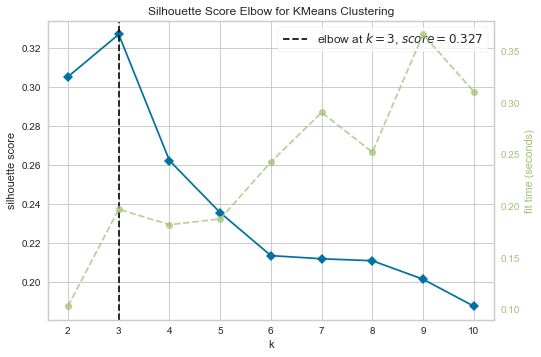

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

time: 3.66 s (started: 2021-11-02 22:47:11 +07:00)


In [20]:
# Quick examination of elbow method to find numbers of clusters to make.
print('The Silhouette Score to find the No. of Optimal Clusters')
Elbow_M = KElbowVisualizer(KMeans(random_state=48), k=10, locate_elbow=True, timings=True, metric='silhouette')
Elbow_M.fit(train_data)
Elbow_M.show()

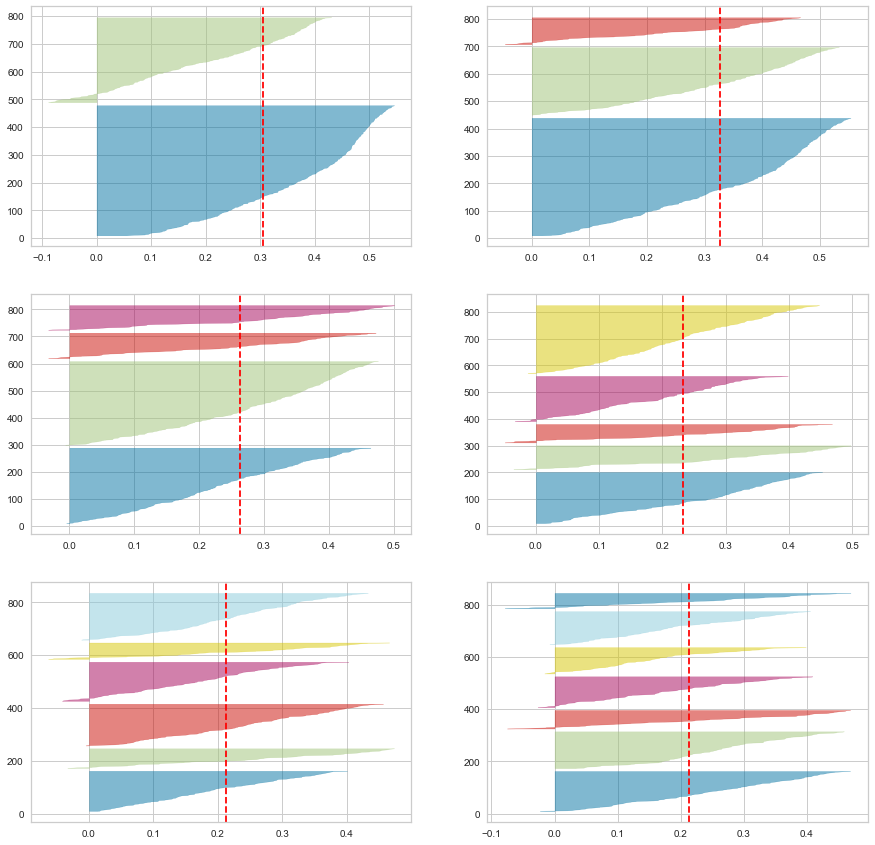

time: 3.25 s (started: 2021-11-02 22:47:14 +07:00)


In [21]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in range(2, 8):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(train_data)

Pada visualisasi Silhouette diatas bisa dilihat bahwa K value dengan jumlah 3 memiliki rata-rata tertinggi yaitu diatas 0.32. Maka K value yang akan kita pilih yaitu 3.

## Build K-Means Model

In [22]:
# Build kmeans with k value is 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmean_model = kmeans.fit_predict(train_data_pca)

time: 234 ms (started: 2021-11-02 22:47:18 +07:00)


In [23]:
# Set cluster prediction to new feature
college_data['cluster'] = kmean_model
college_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,Outstate,Room.Board,PhD,Terminal,Expend,cluster
0,1660,1232,721,23,52,2885,7440,3300,70,78,7041,0
1,2186,1924,512,16,29,2683,12280,6450,29,30,10527,0
2,1428,1097,336,22,50,1036,11250,3750,53,66,8735,0
3,417,349,137,60,89,510,12960,5450,92,97,19016,1
4,193,146,55,16,44,249,7560,4120,76,72,10922,0


time: 31 ms (started: 2021-11-02 22:47:18 +07:00)


## Proportion  Number of Clusters

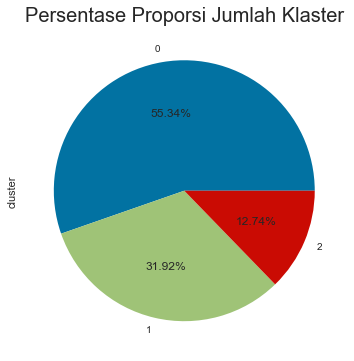

time: 297 ms (started: 2021-11-02 22:47:18 +07:00)


In [24]:
# Create proportion number of cluster
plt.figure(figsize=(6, 6))
college_data['cluster'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Persentase Proporsi Jumlah Klaster', fontsize=20)
plt.show()

## Cluster Pattern Visualize

No handles with labels found to put in legend.


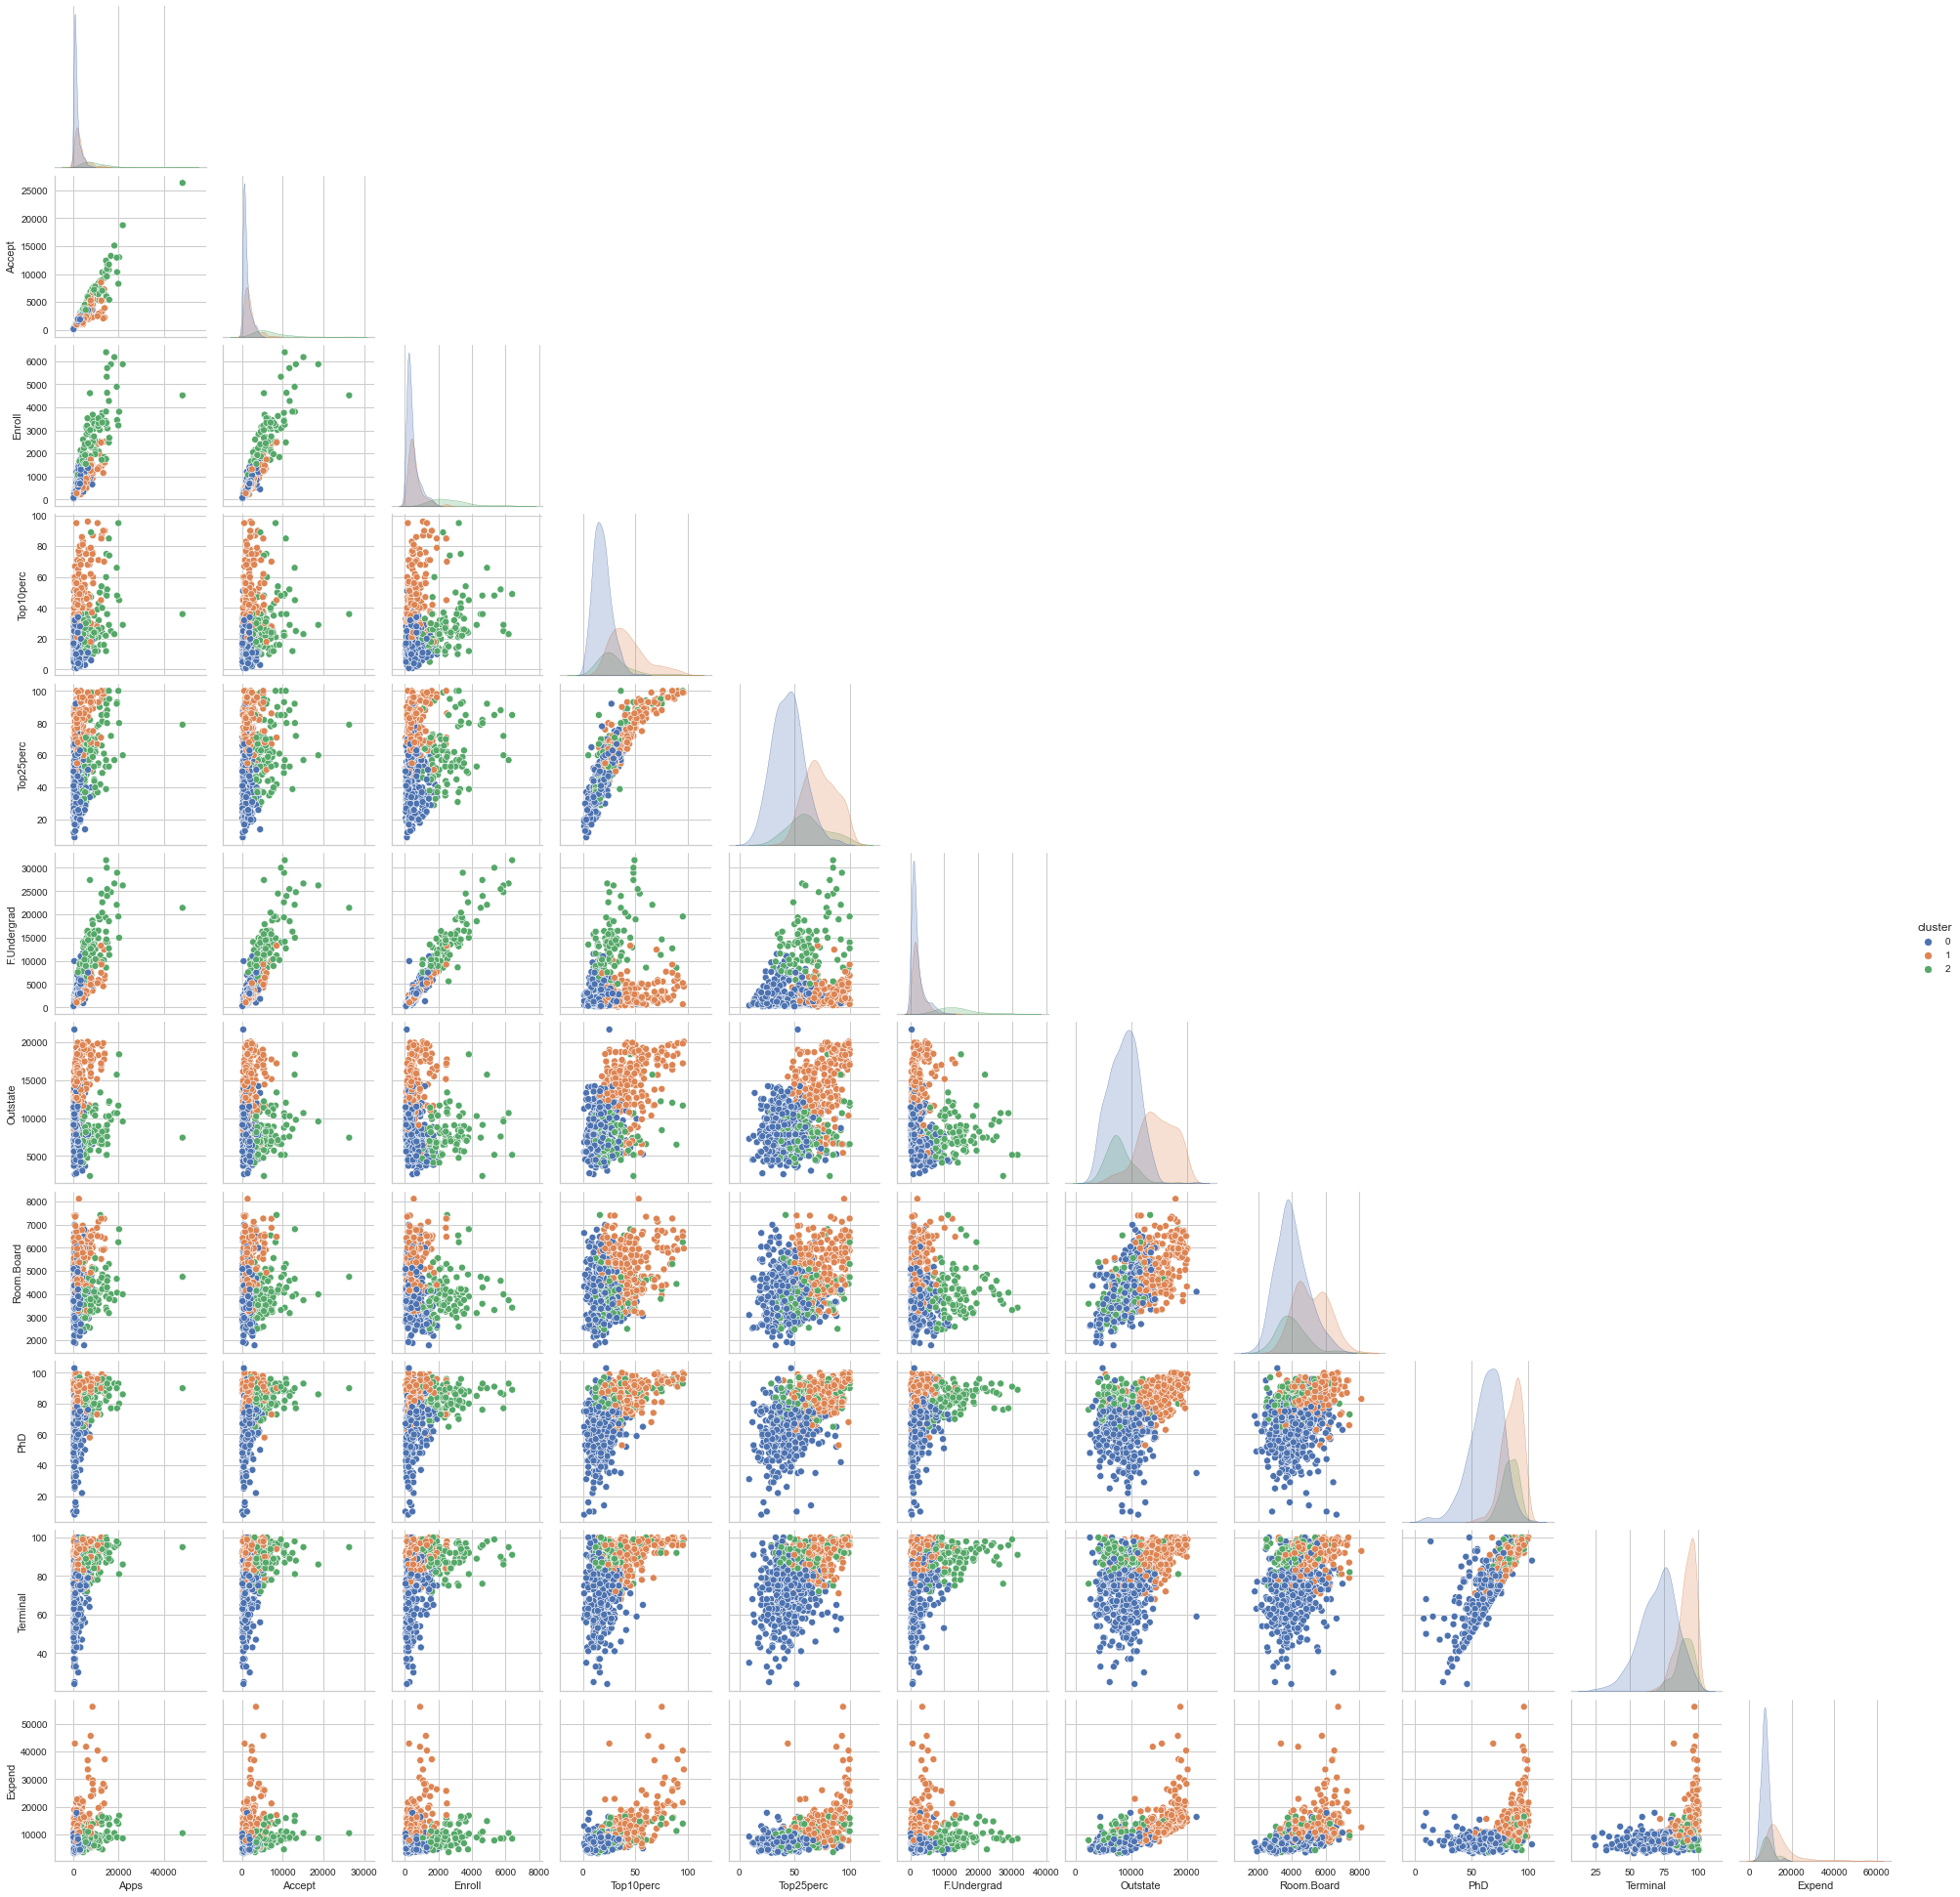

time: 29.7 s (started: 2021-11-02 22:47:18 +07:00)


In [25]:
sns.pairplot(data=college_data, hue='cluster', corner=True, palette='deep')
plt.legend(loc='lower center', bbox_to_anchor=(0.0, -0.15), ncol=3)
plt.show()

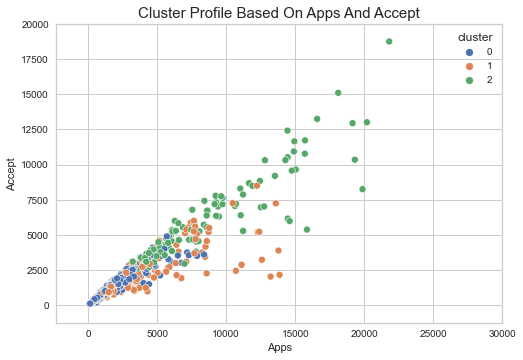

time: 516 ms (started: 2021-11-02 22:47:48 +07:00)


In [26]:
sns.scatterplot(data=college_data, x='Apps', y='Accept', hue='cluster', palette="deep")
plt.title('Cluster Profile Based On Apps And Accept', fontsize=15)
plt.xlim(xmax=30000)
plt.ylim(ymax=20000)
plt.show()

Grafik Apps vs Accept menunjukkan pola cluster :

* cluster 0: low accept & low apps
* cluster 1: low  accept & average apps
* cluster 2: high accept & high apps

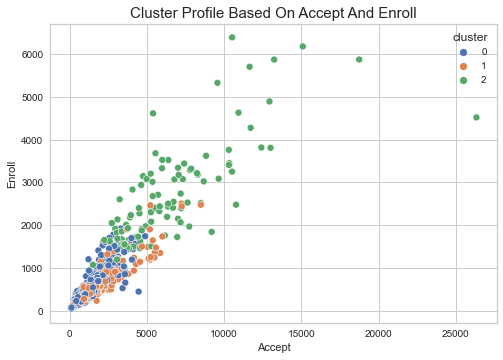

time: 406 ms (started: 2021-11-02 22:47:49 +07:00)


In [27]:
sns.scatterplot(data=college_data, x='Accept', y='Enroll', hue='cluster', palette="deep")
plt.title('Cluster Profile Based On Accept And Enroll', fontsize=15)
plt.show()

Grafik Accept vs Enroll menunjukkan pola cluster :

* cluster 0: low accept & low enroll
* cluster 1: low accept & low enroll
* cluster 2: average accept & high enroll

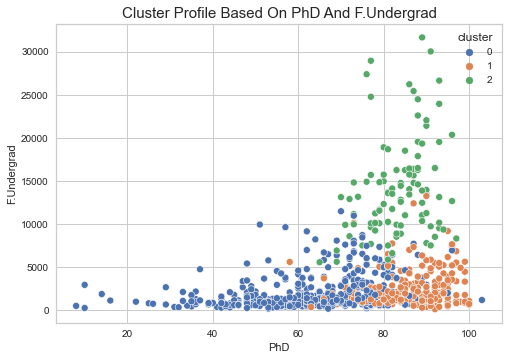

time: 407 ms (started: 2021-11-02 22:47:49 +07:00)


In [28]:
sns.scatterplot(data=college_data, x='PhD', y='F.Undergrad', hue='cluster', palette="deep")
plt.title('Cluster Profile Based On PhD And F.Undergrad', fontsize=15)
plt.show()

Grafik PhD vs F.Undergrad menunjukkan pola cluster :

* cluster 0: average PhD & low f.undergrad
* cluster 1: high PhD & low f.undergrad
* cluster 2: high PhD & average f.undergrad

In [29]:
# Average each feature by clusters
college_data.groupby('cluster').mean().reset_index()

,cluster,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,Outstate,Room.Board,PhD,Terminal,Expend
0,0,1466.218605,1068.872093,439.109302,17.918605,44.067442,2025.818605,8639.397674,3986.051163,62.758140,70.767442,7405.337209
1,1,3062.782258,1839.040323,597.709677,43.233871,73.358871,2442.762097,14594.883065,5149.588710,85.475806,91.278226,13888.072581
2,2,9517.464646,6595.090909,2717.070707,30.161616,62.747475,14120.414141,7857.858586,3986.848485,83.565657,89.515152,8862.787879


time: 31 ms (started: 2021-11-02 22:47:49 +07:00)


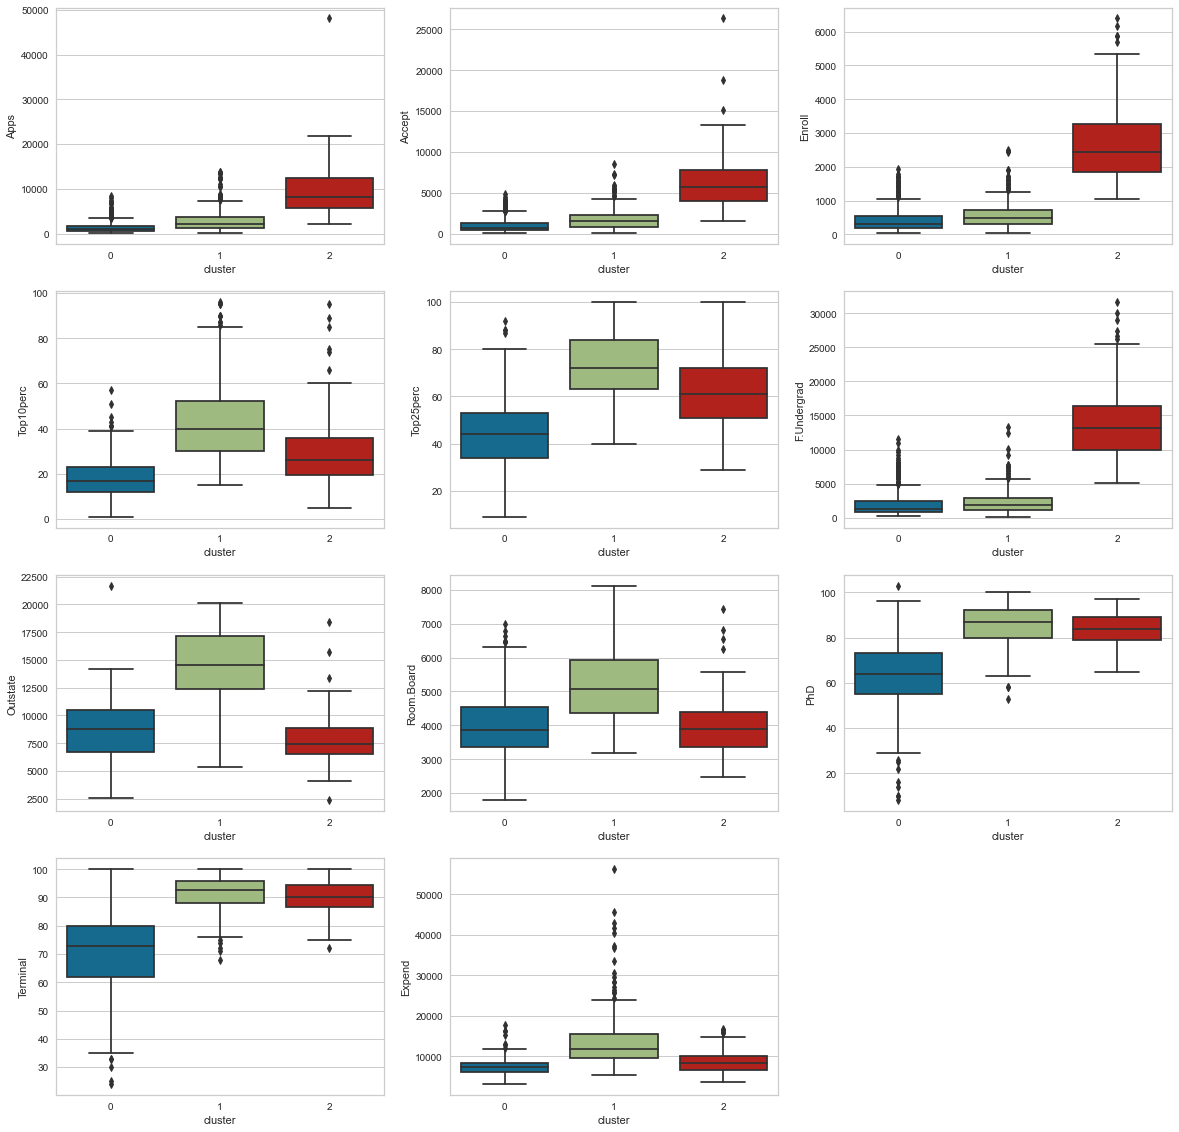

time: 2.16 s (started: 2021-11-02 22:47:49 +07:00)


In [30]:
plt.figure(figsize=(20,20))
pos = 1
col = college_data.loc[:, ~college_data.columns.isin(['cluster'])]

for i in col.columns:
    plt.subplot(4, 3, pos)
    sns.boxplot(data=college_data, x='cluster', y=i)
    pos += 1